# 1. Imports and config

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 200)

sns.set()

In [3]:
train_data = pd.read_csv('./data/train.csv')

In [4]:
test_data = pd.read_csv('./data/test.csv')

In [22]:
solution = pd.read_csv('./data/sample_submission.csv')

In [5]:
train_data.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


In [6]:
test_data.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,250000,0.812665,15,-1.239120,-0.893251,295.5770,15.87120,23.04360,0.942256,29.898000,...,0.446389,-422.332,-1.44630,1.69075,1.059300,-3.010570,1.94664,0.529470,1.386950,8.78767
1,250001,0.190344,131,-0.501361,0.801921,64.8866,3.09703,344.80500,0.807194,38.421900,...,0.377179,10352.200,21.06270,1.84351,0.251895,4.440570,1.90309,0.248534,0.863881,11.79390
2,250002,0.919671,19,-0.057382,0.901419,11961.2000,16.39650,273.24000,-0.003300,37.940000,...,0.990140,3224.020,-2.25287,1.55100,-0.559157,17.838600,1.83385,0.931796,2.336870,9.05400
3,250003,0.860985,19,-0.549509,0.471799,7501.6000,2.80698,71.08170,0.792136,0.395235,...,1.396880,9689.760,14.77150,1.41390,0.329272,0.802437,2.23251,0.893348,1.359470,4.84833
4,250004,0.313229,89,0.588509,0.167705,2931.2600,4.34986,1.57187,1.118300,7.754630,...,0.862502,2693.350,44.18050,1.58020,-0.191021,26.253000,2.68238,0.361923,1.532800,3.70660


# 2. Exploritory Data Analysis
thinking about how to solve the problems

In [7]:
# How many unique values in "id" column?
test_data['id'].nunique()

150000

In [8]:
test_data['f1'].nunique()

284

In [9]:
test_data.describe()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,324999.500000,0.513137,51.612380,0.108166,0.047793,3567.849290,8.189529,163.303236,0.379849,16.626872,...,0.582965,4858.089360,22.590537,2.028026,0.079295,1.565588,2.422223,0.537009,1.575402,8.045628
std,43301.414527,0.307512,42.662212,1.338636,0.790894,6045.626929,5.443633,181.799298,0.812515,99.813298,...,0.445033,8497.126809,14.838069,0.898257,0.590101,9.268188,0.894294,0.226024,0.645402,5.642812
min,250000.000000,-0.064172,-17.000000,-7.952920,-1.491030,-7801.580000,-3.097580,-39.020100,-4.062280,-496.326000,...,-0.466885,-12183.200000,-4.134800,0.120638,-2.013430,-24.337800,-1.056300,0.010615,-0.673333,-0.762355
25%,287499.750000,0.254897,18.000000,-0.615063,-0.718730,161.797000,4.129198,27.774750,-0.024041,-17.780300,...,0.282301,73.567275,11.585500,1.470310,-0.408236,-4.015442,1.910508,0.359924,1.216300,3.719902
50%,324999.500000,0.516855,41.000000,0.253162,0.003786,935.088500,7.467945,90.090350,0.622288,8.433805,...,0.483258,1054.480000,19.939150,1.660235,0.215228,0.811492,2.341185,0.530720,1.449735,7.191640
75%,362499.250000,0.778300,76.000000,0.759430,0.761793,4076.672500,11.016600,239.953000,0.936772,55.053075,...,0.770184,5613.215000,32.208850,2.308523,0.502962,6.218857,2.918890,0.708449,1.895472,11.018700
max,399999.000000,1.072210,270.000000,9.931070,1.670420,38434.400000,34.533000,943.297000,4.183330,466.535000,...,3.347080,54417.900000,80.209000,5.421360,1.920450,42.504100,5.583770,1.102790,4.472940,33.686300


In [10]:
print(len(test_data["id"]))

150000


# 3. Clean the dirty data

- null values
- garbage strings
- missing time serias data 
- etc

Pretty sure we don't need to clean the data. 

# Manipulating the data

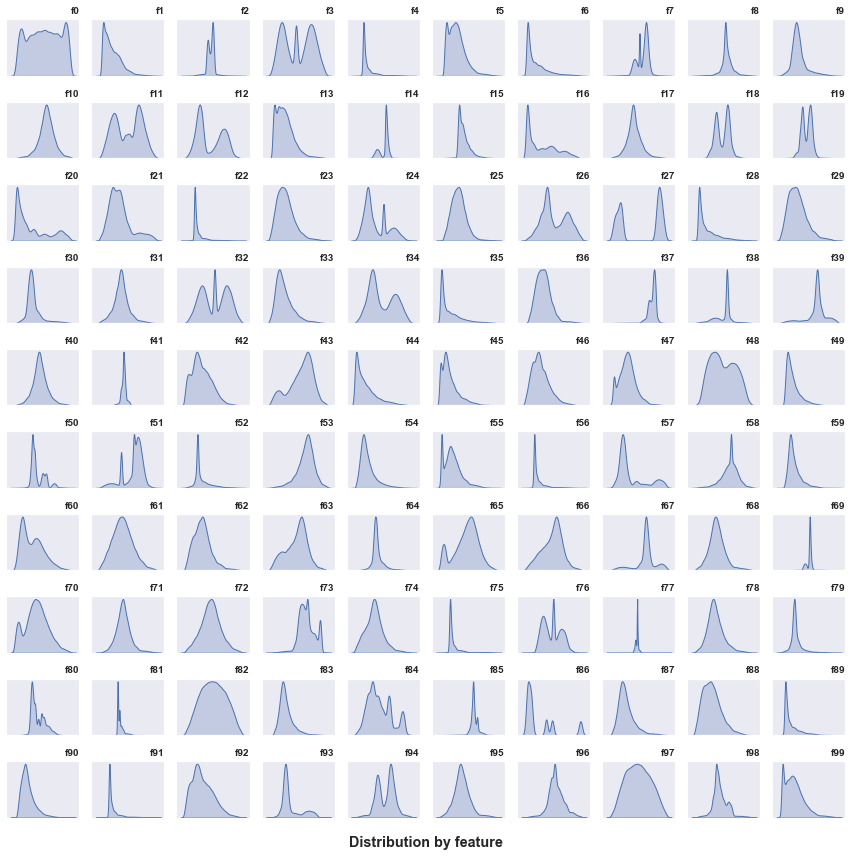

In [12]:
fig, axes = plt.subplots(10,10,figsize=(12, 12))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    sns.kdeplot(data=train_data, x=f'f{idx}', 
                fill=True, 
                ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    ax.set_title(f'f{idx}', loc='right', weight='bold', fontsize=10)

fig.supxlabel('Distribution by feature', ha='center', fontweight='bold')

fig.tight_layout()
plt.show()
    

<Figure size 1440x1440 with 0 Axes>

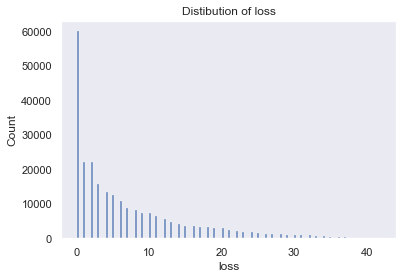

<Figure size 1440x1440 with 0 Axes>

In [14]:
#Plot
sns.set_style("dark")
sns.histplot(data=train_data.loss)

plt.title('Distibution of loss')
plt.figure(figsize=(20,20))

In [19]:
# drop the ID columns
train_data.drop(['id'], axis=1, inplace=True)
test_data.drop(['id'], axis=1, inplace=True)
train_data.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.513137,51.612380,0.108166,0.047793,3567.849290,8.189529,163.303236,0.379849,16.626872,1.190402,...,0.582965,4858.089360,22.590537,2.028026,0.079295,1.565588,2.422223,0.537009,1.575402,8.045628
std,0.307512,42.662212,1.338636,0.790894,6045.626929,5.443633,181.799298,0.812515,99.813298,0.099975,...,0.445033,8497.126809,14.838069,0.898257,0.590101,9.268188,0.894294,0.226024,0.645402,5.642812
min,-0.064172,-17.000000,-7.952920,-1.491030,-7801.580000,-3.097580,-39.020100,-4.062280,-496.326000,0.929603,...,-0.466885,-12183.200000,-4.134800,0.120638,-2.013430,-24.337800,-1.056300,0.010615,-0.673333,-0.762355
25%,0.254897,18.000000,-0.615063,-0.718730,161.797000,4.129198,27.774750,-0.024041,-17.780300,1.132580,...,0.282301,73.567275,11.585500,1.470310,-0.408236,-4.015442,1.910508,0.359924,1.216300,3.719902
50%,0.516855,41.000000,0.253162,0.003786,935.088500,7.467945,90.090350,0.622288,8.433805,1.170310,...,0.483258,1054.480000,19.939150,1.660235,0.215228,0.811492,2.341185,0.530720,1.449735,7.191640
75%,0.778300,76.000000,0.759430,0.761793,4076.672500,11.016600,239.953000,0.936772,55.053075,1.219200,...,0.770184,5613.215000,32.208850,2.308523,0.502962,6.218857,2.918890,0.708449,1.895472,11.018700
max,1.072210,270.000000,9.931070,1.670420,38434.400000,34.533000,943.297000,4.183330,466.535000,1.711020,...,3.347080,54417.900000,80.209000,5.421360,1.920450,42.504100,5.583770,1.102790,4.472940,33.686300


In [49]:
# doing matrix stuff to get data frame into pred. vectors
X_train = train_data.iloc[:, 0:-1].values
y_train = train_data.iloc[:, -1].values
final_X_test = test_data
y_true = solution["loss"]

In [50]:
X_train.shape

(250000, 100)

In [51]:
y_train.shape

(250000,)

In [52]:
y_true.shape

(150000,)

In [53]:
final_X_test.shape

(150000, 100)

In [54]:
# do the regression
from rgf.sklearn import RGFRegressor

regressor = RGFRegressor(algorithm="RGF")

regressor.fit(X_train, y_train)

y_pred = regressor.predict(final_X_test)

In [55]:
# print out RMSE score
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_true, y_pred, squared=False)
print("Score is %.5f" % RMSE)

Score is 6.91045


In [56]:
test_data.index += 250000

In [57]:
submission = pd.DataFrame({"id": test_data.index, "loss": y_pred})

In [58]:
submission.head()

,id,loss
0,250000,7.485293
1,250001,4.087924
2,250002,8.425441
3,250003,7.242711
4,250004,7.873335


In [60]:
submission.to_csv("./data/submission.csv", index=False)